<a href="https://colab.research.google.com/github/Asif-PA/Loan-Data-Analysis/blob/main/Loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction - Loans dataset aims to identify variables which indicate if a  person is likely to default, which can be used for identifying the risky loan  applicants to avoid any financial loss to the company.


Dataset Description - It contains the complete loan data for all loans  issued through the time period 2007 to 2011.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.Import the dataset and understand it.**


In [ ]:
df=pd.read_csv('/content/loan.csv')

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


In [ ]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,...,home_improvement,11.33,2822.969293,1213.88,2500.0,322.97,Jul-10,80.90,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,...,credit_card,6.40,9913.491822,1020.51,8500.0,1413.49,Jul-10,281.94,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,...,debt_consolidation,2.30,5272.161128,1397.12,5000.0,272.16,Apr-08,0.00,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,...,other,3.72,5174.198551,672.66,5000.0,174.20,Jan-08,0.00,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,< 1 year,...,debt_consolidation,14.29,9195.263334,980.83,7500.0,1695.26,Jun-10,256.59,NaN,NaN


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'emp_length', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,12153.596544,11567.149118,9793.348813,2263.663172,2678.826162,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,9042.040766,8942.672613,7065.522127,2608.111964,4447.136012,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,5576.930000,5112.310000,4600.000000,662.180000,218.680000,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,9899.640319,9287.150000,8000.000000,1348.910000,546.140000,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,16534.433040,15798.810000,13653.260000,2833.400000,3293.160000,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,58563.679930,58563.680000,35000.020000,23563.680000,36115.200000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

**2.List down the number of rows and columns.**


In [ ]:
df.shape

(39717, 23)

**There are 39717 rows and 23 columns**

**3.‘Int_rate’ column is character type. With the help of lambda function  convert into float type.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

In [ ]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.strip('%')))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

**4.Check the datatype of each column.**


In [ ]:
df.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object
emp_length,object


**5.Cleaning the dataset- Remove the columns having complete NaN value in  the entire dataset.**


In [ ]:
df = df.dropna(axis=1, how='all')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  float64
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

**6.Write the code to find the value counts of the ‘loan_status’ category  column and filter only the ‘fully paid’ and ‘charged off’ categories.**


In [ ]:
value_counts = df['loan_status'].value_counts()
filtered_counts = value_counts.loc[['Fully Paid', 'Charged Off']]
filtered_counts


,count
loan_status,
Fully Paid,32950
Charged Off,5627


**7.Filter the ‘Emp_Len’ column to extract the numerical value from the  string.**


In [ ]:
df['emp_length'] = df['emp_length'].apply(
    lambda x: 0 if pd.isnull(x) else (0 if '< 1' in x else (10 if '10+' in x else int(x.split()[0]))))

In [ ]:
df['emp_length']

,emp_length
0,10
1,0
2,10
3,10
4,1
...,...
39712,4
39713,3
39714,0
39715,0


**8.Using the Lambda function, remove the month from the ‘term’ column  such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.**


In [ ]:
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [ ]:
df['term']

,term
0,36
1,60
2,36
3,36
4,60
...,...
39712,36
39713,36
39714,36
39715,36


**9.Create a new column as risky_loan_applicant by comparing loan_amnt  and funded_amnt with the following criteria -
If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as  ‘1’.**


In [ ]:
df['risky_loan_applicant'] = np.where(df['loan_amnt'] <= df['funded_amnt'], 0, 1)

In [ ]:
df['risky_loan_applicant'].value_counts()

,count
risky_loan_applicant,
0,37868
1,1849


**10.Using the bar plot visualize the loan_status column against categorical  column grade, term, verification_status . Write the observation from  each graph.**


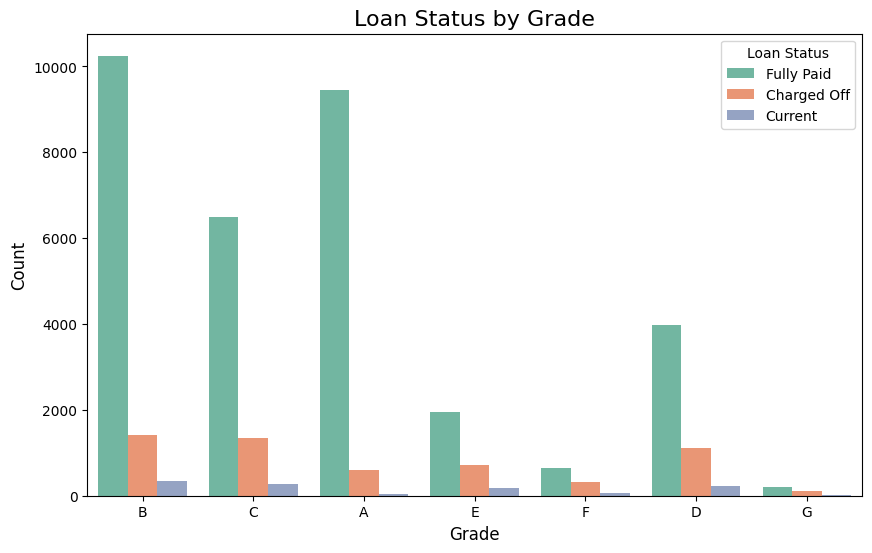

In [ ]:
# Bar plot for 'loan_status' vs 'Grade'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='loan_status', palette='Set2')
plt.title("Loan Status by Grade", fontsize=16)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

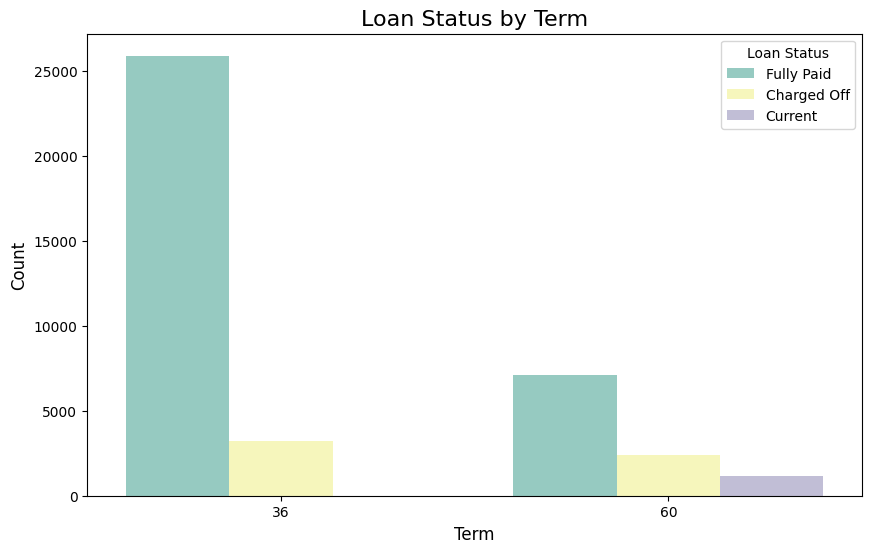

In [ ]:
# Bar plot for 'loan_status' vs 'term'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='term', hue='loan_status', palette='Set3')
plt.title("Loan Status by Term", fontsize=16)
plt.xlabel("Term", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

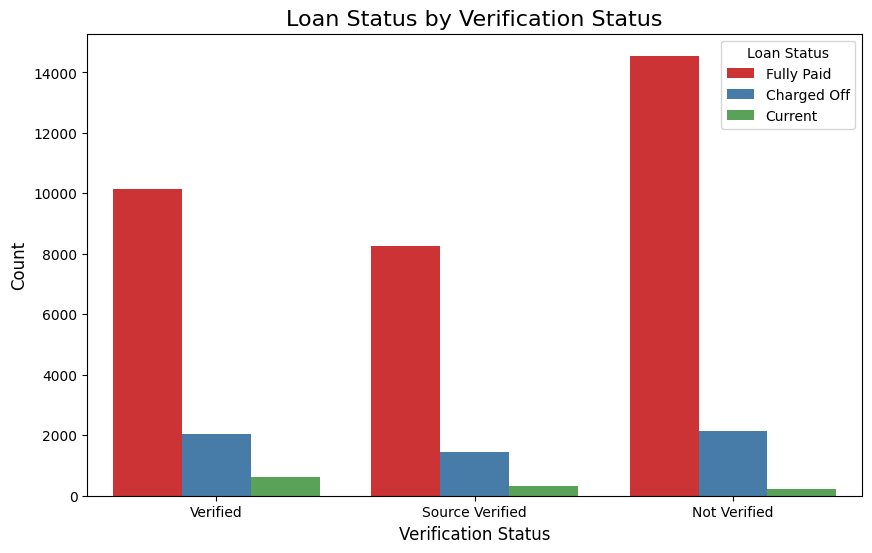

In [ ]:
# Bar plot for 'loan_status' vs 'verification_status'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='verification_status', hue='loan_status', palette='Set1')
plt.title("Loan Status by Verification Status", fontsize=16)
plt.xlabel("Verification Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Loan Status")
plt.show()

**11.Using a user defined function convert the ‘emp_len’ column into  categorical column as follows -
If emp_len is less than equals to 1 then recode as ‘fresher’.
If emp_len is greater than 1 and less than 3 then recode as ‘junior’.  If emp_len is greater than 3 and less than 7 then recode as ‘senior’  If emp_len is greater than 7 then recode as ‘expert’.**


In [ ]:
def categorize_emp_len(emp_length):
    if emp_length <= 1:
        return 'fresher'
    elif 1 < emp_length < 3:
        return 'junior'
    elif 3 <= emp_length < 7:
        return 'senior'
    else:
        return 'expert'

df['emp_category'] = df['emp_length'].apply(categorize_emp_len)

In [ ]:
df['emp_category']

,emp_category
0,expert
1,fresher
2,expert
3,expert
4,fresher
...,...
39712,senior
39713,senior
39714,fresher
39715,fresher


**12.Find the sum of ‘loan_amnt’ for each grade and display the distribution  of ‘loan_amnt’ using a pie plot.**


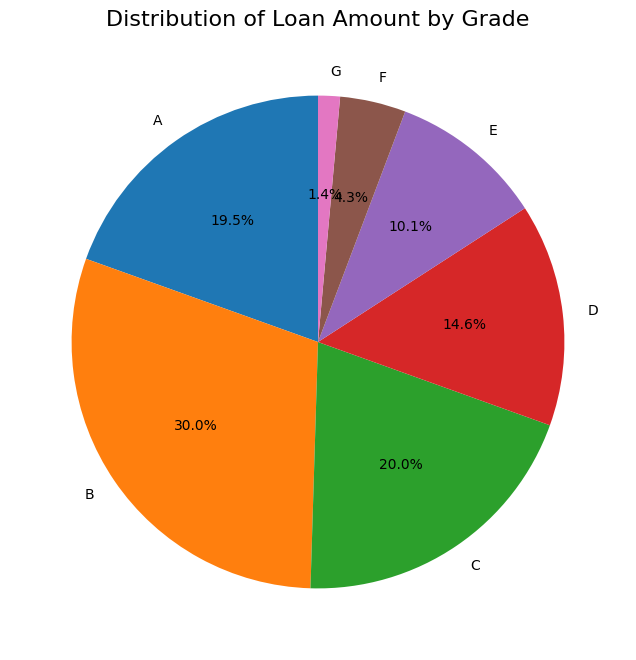

In [ ]:
loan_sum_by_grade = df.groupby('grade')['loan_amnt'].sum()

plt.figure(figsize=(8, 8))
loan_sum_by_grade.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Distribution of Loan Amount by Grade', fontsize=16)
plt.ylabel('')
plt.show()